<a href="https://colab.research.google.com/github/CI-SSLab/bladder_cancer_tucr_xai/blob/main/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

X = np.array(pd.read_csv("X_0001_2.csv", header=None))

y = np.array(pd.read_csv("Y.csv", header=None)).T

labels = np.array(pd.read_csv("Labels_0001_2.csv", header=None))

print(X.shape)

(41, 70)


In [ ]:
# Lasso 
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
import seaborn as sns

model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(X, y[0,:])

coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=labels
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

feature_importance = abs(model[1].coef_)

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

ranked = sorted_idx[::-1][:70]

fi = feature_importance[ranked]

print(labels[ranked])

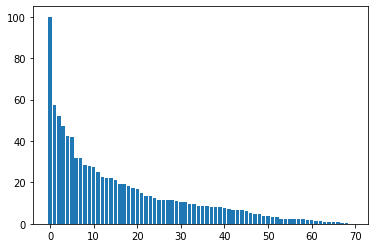

[['uc.8+']
 ['uc.283+A']
 ['uc.160+']
 ['uc.145+A']
 ['uc.339+']
 ['uc.369+']
 ['uc.325+']
 ['uc.466+A']
 ['uc.3+']
 ['uc.263+A']
 ['uc.346+']
 ['uc.229+A']
 ['uc.282+A']
 ['uc.213+A']
 ['uc.142+A']
 ['uc.450+']
 ['uc.230+']
 ['uc.287+A']
 ['uc.363+A']
 ['uc.288+A']
 ['uc.20+']
 ['uc.217+A']
 ['uc.238+']
 ['uc.473+A']
 ['uc.195+']
 ['uc.362+A']
 ['uc.462+A']
 ['uc.469+A']
 ['uc.31+']
 ['uc.378+A']
 ['uc.248+A']
 ['uc.477+A']
 ['uc.33+']
 ['uc.153+A']
 ['uc.342+']
 ['uc.325+A']
 ['uc.448+A']
 ['uc.392+A']
 ['uc.354+A']
 ['uc.374+A']
 ['uc.163+']
 ['uc.48+A']
 ['uc.177+A']
 ['uc.34+A']
 ['uc.298+']
 ['uc.106+A']
 ['uc.200+']
 ['uc.96+']
 ['uc.190+A']
 ['uc.372+']
 ['uc.206+A']
 ['uc.43+']
 ['uc.468+']
 ['uc.138+']
 ['uc.44+A']
 ['uc.412+A']
 ['uc.275+A']
 ['uc.456+A']
 ['uc.404+']
 ['uc.189+']
 ['uc.268+']
 ['uc.28+']
 ['uc.4+']
 ['uc.457+']
 ['uc.388+A']
 ['uc.21+A']
 ['uc.234+']
 ['uc.445+A']
 ['uc.89+']
 ['uc.16+']]


In [ ]:
# logistic regression for feature importance (classification)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Define the model
model = LogisticRegression()

# Fit the model
model.fit(X, y[0,:])

# Get importance
importance = model.coef_[0]

# Summarize feature importance
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

ranked = sorted_idx[::-1][:70]

fi = feature_importance[ranked]

pyplot.bar([x for x in range(len(fi))], fi)
pyplot.show()

print(labels[ranked])

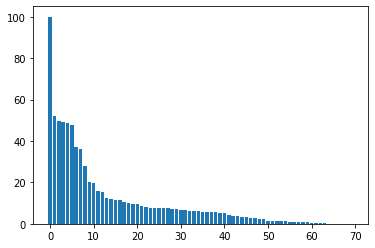

[['uc.325+A']
 ['uc.466+A']
 ['uc.346+']
 ['uc.369+']
 ['uc.354+A']
 ['uc.8+']
 ['uc.283+A']
 ['uc.153+A']
 ['uc.217+A']
 ['uc.145+A']
 ['uc.362+A']
 ['uc.160+']
 ['uc.287+A']
 ['uc.363+A']
 ['uc.177+A']
 ['uc.33+']
 ['uc.263+A']
 ['uc.325+']
 ['uc.462+A']
 ['uc.229+A']
 ['uc.404+']
 ['uc.282+A']
 ['uc.106+A']
 ['uc.3+']
 ['uc.445+A']
 ['uc.20+']
 ['uc.473+A']
 ['uc.16+']
 ['uc.392+A']
 ['uc.48+A']
 ['uc.457+']
 ['uc.89+']
 ['uc.268+']
 ['uc.4+']
 ['uc.388+A']
 ['uc.469+A']
 ['uc.138+']
 ['uc.477+A']
 ['uc.288+A']
 ['uc.468+']
 ['uc.298+']
 ['uc.238+']
 ['uc.163+']
 ['uc.450+']
 ['uc.374+A']
 ['uc.31+']
 ['uc.372+']
 ['uc.96+']
 ['uc.213+A']
 ['uc.206+A']
 ['uc.21+A']
 ['uc.248+A']
 ['uc.200+']
 ['uc.34+A']
 ['uc.189+']
 ['uc.412+A']
 ['uc.28+']
 ['uc.190+A']
 ['uc.378+A']
 ['uc.339+']
 ['uc.44+A']
 ['uc.234+']
 ['uc.342+']
 ['uc.142+A']
 ['uc.456+A']
 ['uc.230+']
 ['uc.195+']
 ['uc.448+A']
 ['uc.275+A']
 ['uc.43+']]


In [ ]:
# Random Forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# Define the model
model = RandomForestClassifier()

# Fit the model
model.fit(X, y[0,:].T)

# Get importance
importance = model.feature_importances_

# Summarize feature importance
feature_importance = abs(model.feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

ranked = sorted_idx[::-1][:70]

fi = feature_importance[ranked]

pyplot.bar([x for x in range(len(fi))], fi)
pyplot.show()

print(labels[ranked])

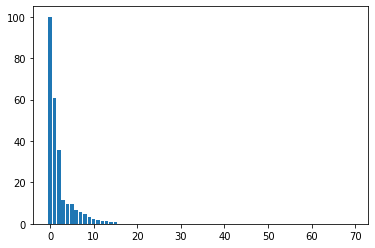

[['uc.346+']
 ['uc.354+A']
 ['uc.369+']
 ['uc.3+']
 ['uc.8+']
 ['uc.325+A']
 ['uc.362+A']
 ['uc.298+']
 ['uc.392+A']
 ['uc.268+']
 ['uc.195+']
 ['uc.238+']
 ['uc.450+']
 ['uc.466+A']
 ['uc.404+']
 ['uc.213+A']
 ['uc.163+']
 ['uc.275+A']
 ['uc.325+']
 ['uc.469+A']
 ['uc.445+A']
 ['uc.190+A']
 ['uc.189+']
 ['uc.142+A']
 ['uc.229+A']
 ['uc.43+']
 ['uc.234+']
 ['uc.378+A']
 ['uc.473+A']
 ['uc.230+']
 ['uc.374+A']
 ['uc.4+']
 ['uc.282+A']
 ['uc.21+A']
 ['uc.138+']
 ['uc.206+A']
 ['uc.342+']
 ['uc.462+A']
 ['uc.106+A']
 ['uc.28+']
 ['uc.477+A']
 ['uc.217+A']
 ['uc.363+A']
 ['uc.287+A']
 ['uc.283+A']
 ['uc.263+A']
 ['uc.339+']
 ['uc.96+']
 ['uc.200+']
 ['uc.468+']
 ['uc.31+']
 ['uc.288+A']
 ['uc.456+A']
 ['uc.448+A']
 ['uc.48+A']
 ['uc.44+A']
 ['uc.160+']
 ['uc.248+A']
 ['uc.372+']
 ['uc.412+A']
 ['uc.388+A']
 ['uc.145+A']
 ['uc.457+']
 ['uc.89+']
 ['uc.20+']
 ['uc.16+']
 ['uc.177+A']
 ['uc.153+A']
 ['uc.33+']
 ['uc.34+A']]


In [ ]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# Define the model
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

# Fit the model
model.fit(X, y[0,:].T)

# Get importance
importance = model.feature_importances_

# Summarize feature importance

feature_importance = abs(model.feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

ranked = sorted_idx[::-1][:70]

fi = feature_importance[ranked]

pyplot.bar([x for x in range(len(fi))], fi)
pyplot.show()

print(labels[ranked])

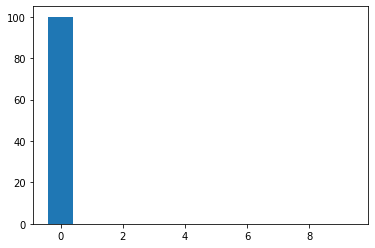

[['uc.8+']
 ['uc.427+']
 ['uc.378+A']
 ['uc.238+']
 ['uc.142+A']
 ['uc.190+A']
 ['uc.445+A']
 ['uc.469+A']
 ['uc.325+']
 ['uc.369+']]


In [ ]:
# Permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# Define the model
model = KNeighborsClassifier()

# Fit the model
model.fit(X, y[0,:])

# Perform permutation importance
results = permutation_importance(model, X, y[0,:], scoring='accuracy')

# Summarize feature importance
feature_importance = abs(results.importances_mean)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

ranked = sorted_idx[::-1][:10]

fi = feature_importance[ranked]

pyplot.bar([x for x in range(len(fi))], fi)
pyplot.show()

print(labels[ranked])

In [ ]:
# Evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Evaluate the model
yhat = model.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Configure to select a subset of features
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=5)

In [ ]:
# Learn relationship from training data
fs.fit(X_train, y_train)

# Transform train input data
X_train_fs = fs.transform(X_train)

# Transform test input data
X_test_fs = fs.transform(X_test)

In [ ]:
# Evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature selection
def select_features(X_train, y_train, X_test):
	# Configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
 
	# Learn relationship from training data
	fs.fit(X_train, y_train)

	# Transform train input data
	X_train_fs = fs.transform(X_train)

	# Transform test input data
	X_test_fs = fs.transform(X_test)

	return X_train_fs, X_test_fs, fs

# Define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)

print('Accuracy: %.2f' % (accuracy*100))